# Linear Layers using PyTorch

In [1]:
import torch
import torch.nn as nn

This module contains all the functions we need to create a linear layer. We will use the nn.Linear() function to create a linear layer. We will create a linear layer with 3 input features and 1 output feature (using example from last lesson)

In [2]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features=3, out_features=1)
print(perceptron)


Linear(in_features=3, out_features=1, bias=True)


The output from above represents the following perceptron:
![alt text](perceptron.jpeg)

The weights W and the bias B are randomly initialized. We can access the weights and bias using the following commands:

- iterating through the `named_parameters`;
- acessing the weight and bias directly.

In [3]:
for name, param in perceptron.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353]], requires_grad=True)
bias Parameter containing:
tensor([0.5304], requires_grad=True)


In [4]:
print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


## Plotting the hyperplane using Matplotlib

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(percep):
  
  w1, w2, w3 = percep.weight.data.numpy()[0]
  b = percep.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='plasma')

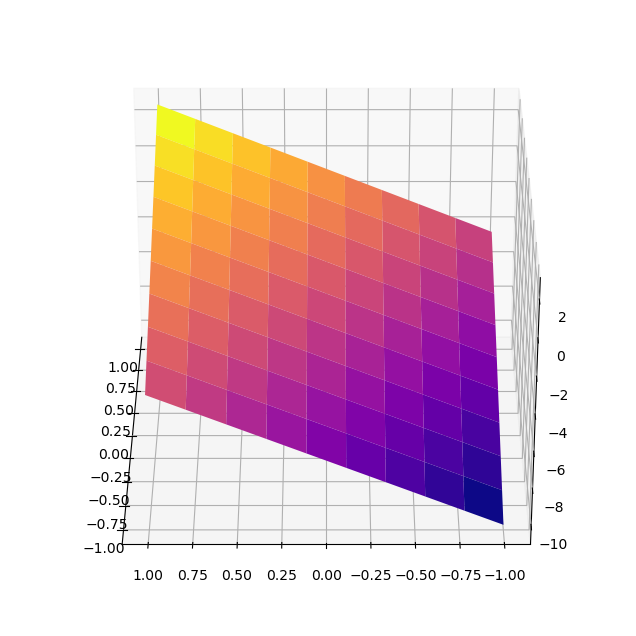

In [16]:
plot3d(perceptron)

## Forward

The name "forward" comes from the fact that we are passing the input data forward through the perceptron and getting the output. We can pass the input data through the perceptron using the following command:

- `linear = nn.Linear(in_features=3, out_features=1)`
- `y = linear(x)`

tensor([0.7391], grad_fn=<AddBackward0>)


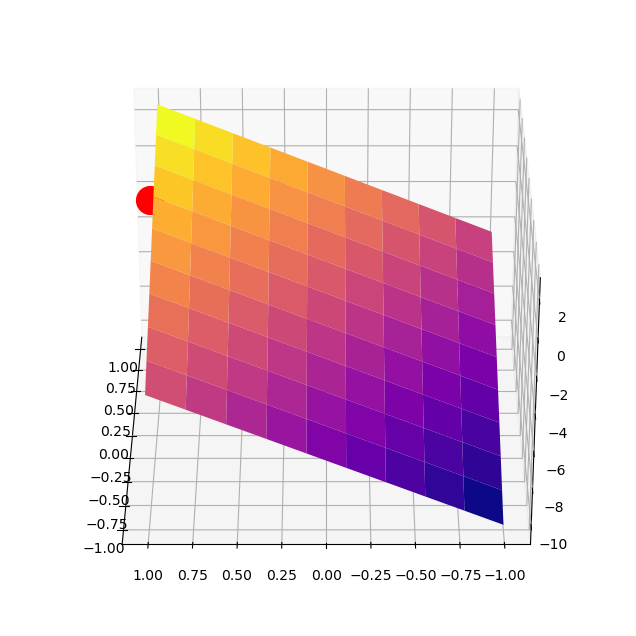

In [18]:
x = torch.Tensor([0, 1, 2])
y = perceptron(x)

print(y)

plot3d(perceptron)
plt.plot(x[0], x[1], x[2], 'ro', markersize=20)